<a href="https://colab.research.google.com/github/Storm00212/Introduction-to-machine-learning-models/blob/main/Simple_neural_network_in_google_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# TensorFlow is usually preinstalled, but let's ensure it's up to date
!pip install tensorflow -q


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

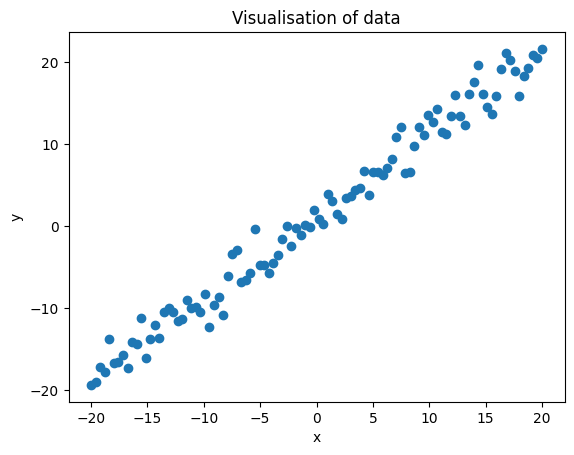

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# Generate simple data
x = np.linspace(-10, 10, 100)
y = 2 * x + 1 + np.random.randn(*x.shape) * 2  # noisy linear data
x = x.reshape(-1, 1) * 2 # simple function with some noises
plt.scatter(x,y) # scattering the parameters.
plt.title("Visualisation of data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid=True
# save the figure.
plt.savefig('x_y_plot.png', dpi=300, bbox_inches='tight')# saving figure in collab.
plt.show()# showing the data.
from google.colab import files
files.download('x_y_plot.png') #save file as png.

In [46]:
# Create model
model = Sequential([
    Dense(16, activation='relu', input_shape=(x.shape[1],)),#number of neurons, activation type and input shape.
    Dense(8, activation='relu'),
    Dense(1)
])


In [47]:
# Compile model

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])# specify the optimizer ,loss and metrics for accuracy.

In [53]:
# Train model
history = model.fit(x, y, epochs=150, validation_split=0.2)# trains the model
loss = model.evaluate(x, y)# evaluates the accuracy and loss per epoch over time
print(f"Training loss: {loss:.4f}")# prints the evaluation.

# training the model.

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 22.6787 - val_accuracy: 0.0000e+00 - val_loss: 216.9297
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 20.5456 - val_accuracy: 0.0000e+00 - val_loss: 210.2374
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 18.3571 - val_accuracy: 0.0000e+00 - val_loss: 203.7701
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 19.9153 - val_accuracy: 0.0000e+00 - val_loss: 197.2637
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 19.6404 - val_accuracy: 0.0000e+00 - val_loss: 190.9889
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 14.7199 - val_accuracy: 0.0000e+00 - val_loss: 185.0286
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 16.8408 - val_accuracy: 0.0000e+00 - val_loss: 178.8049
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2

TypeError: unsupported format string passed to list.__format__

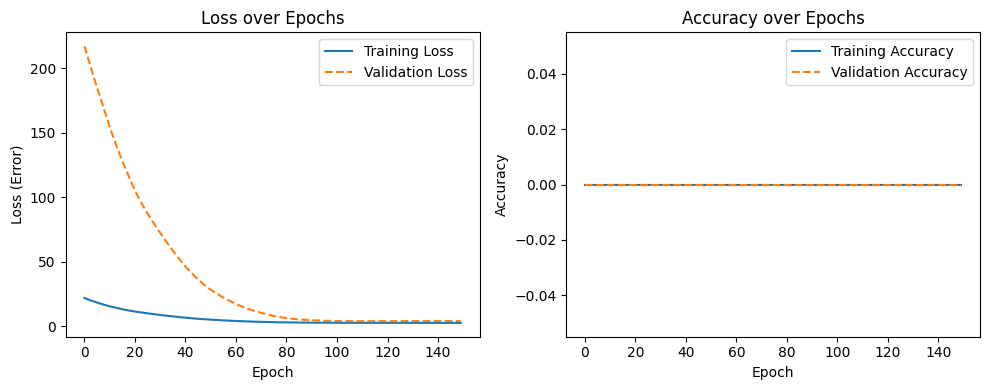

In [54]:
# Plot Training & Validation Loss
#Analyses results from training the model.
plt.figure(figsize=(10,4))#10 columns 4 rows

plt.subplot(1,2,1)#subplot takes the first half
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (Error)")
plt.legend()
plt.grid=True

# Plot Training & Validation Accuracy
plt.subplot(1,2,2) #subplot takes the second half
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid=True

plt.tight_layout()# layout
plt.show()

In [55]:
# Test predictions
# Does test predictions using sample data.
test_x = np.array([-5, 0, 5, 10])#Simple array
pred_y = model.predict(test_x)#model prediction

for i in range(len(test_x)):
    print(f"x = {test_x[i]:>4} → predicted y = {pred_y[i][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
x =   -5 → predicted y = -4.43
x =    0 → predicted y = 0.77
x =    5 → predicted y = 6.17
x =   10 → predicted y = 11.58


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


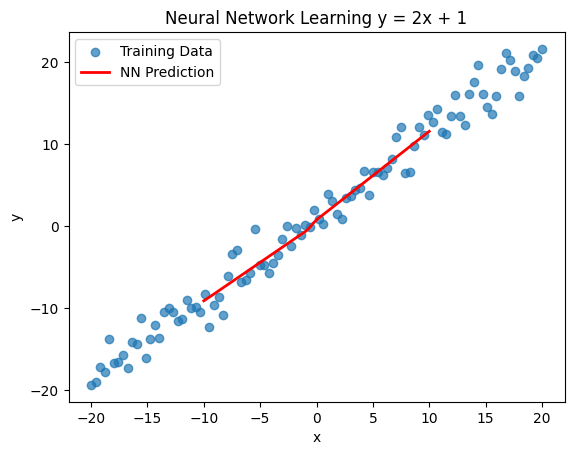

In [56]:
# Plot model predictions over the training data
x_line = np.linspace(-10, 10, 100)
y_pred = model.predict(x_line)

plt.scatter(x, y, label="Training Data", alpha=0.7)
plt.plot(x_line, y_pred, color='red', label="NN Prediction", linewidth=2)
plt.title("Neural Network Learning y = 2x + 1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid=True
plt.savefig('x_y_plot.png', dpi=300, bbox_inches='tight')# saving figure in collab.
plt.show()
#1st neural network complete.
